<a href="https://colab.research.google.com/github/seungmei/ESAA_23_2/blob/main/12%EC%A3%BC%EC%B0%A8%EA%B8%88%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#12주차금과제
##파이썬 머신러닝 완벽가이드 396~408쪽
### Chapter 6. 차원축소
#### SVD(Singular Value Decomposition)
##### SVD 개요
- PCA는 정방 행렬만을 고유벡터로 분해 <-> SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능.
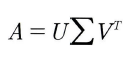

- SVD는 **특이값 분해**, U와 V에 속한 벡터는 특이벡터 singular vector. 특이 벡터는 서로 직교하는 성질. 시그마는 대각행렬.
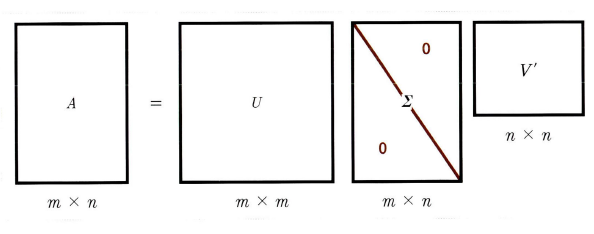

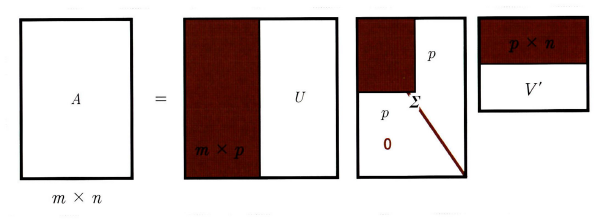

Truncated SVD는 시그마의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것.

In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이렇게 생성된 a 행렬에 svd를 적용해 U, Sigma, Vt를 도출해보자. SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬,Sigma 행렬, V 전치 행렬을 반환.

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해보자. 원본 행렬로의 복원은 이 U, Sigma, Vt를 내적하면 된다. !유의점: 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다.

In [3]:
#Sigma 를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


U, Sigma, Vt를 이용해 a_는 원본행렬 a와 동일하게 복원됨을 알 수 있음.

이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma값이 변하고 이에 따른 차원 축소가 진행될 수 있는지 알아보자. 의존성을 부여하기 위해 a행렬 3행을 1행+2행로 업데이트, 4행은 1행과 같다고 업데이트.

In [4]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이제 a 행렬은 이전과 다르게 행 간 관계가 매우 높아졌다. 이 데이터를 SVD로 다시 분해해보자.

In [5]:
# 다시 SVD를 수행해 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [7]:
# U행렬의 경우느 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD를 이용해 행렬을 분해해보자. 시그마 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다. 원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원할 수 있다.

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\n Sigma값 행렬:', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\n Truncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape,Vt_tr.shape)
print('\n Truncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\n Truncated SVD로 분해 후 복원 행렬:\n', matrix_tr)
### Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

 Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

 Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

 Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673

##### 사이킷런 TruncatedSVD 클래스를 이용한 변환


Text(0, 0.5, 'TruncatedSVD Component 2')

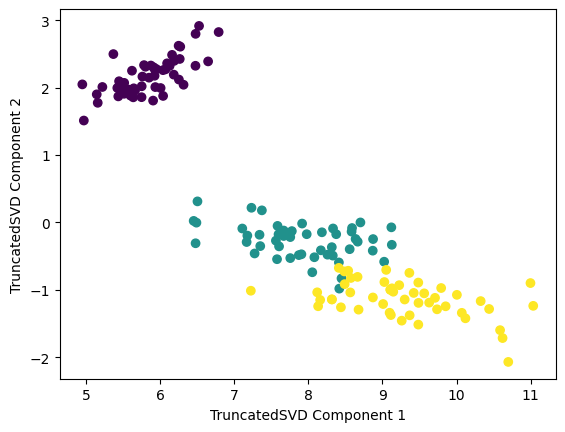

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분.
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

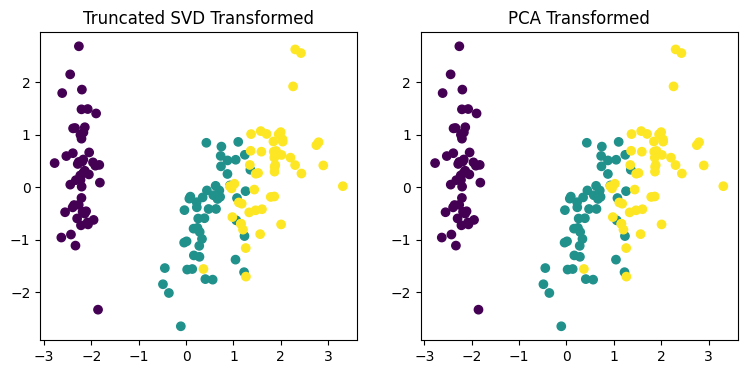

In [10]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardSclaer로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

#TruncatedSVD변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y = iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c = iris.target)
ax1.set_title("Truncated SVD Transformed")
ax2.set_title("PCA Transformed")

In [12]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())
### 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.
### 즉 데이터 세트가 스케일링으로 데이터 중심에 동일해지면
### 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.

2.3364990497931616e-15
2.0816681711721685e-17


#### 5.  NMF(Non-Negative Matrix Factorization)
##### NMF 개요
- NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 것이 보장되면 다음과 같이 좀 더 간단하게 두개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭.
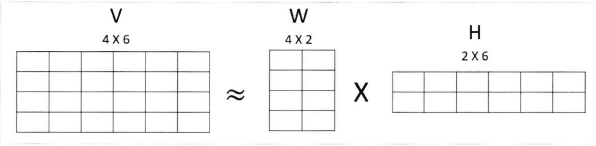


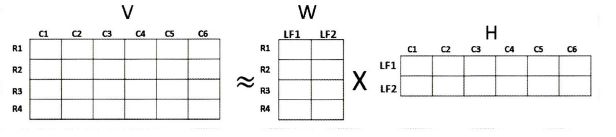

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

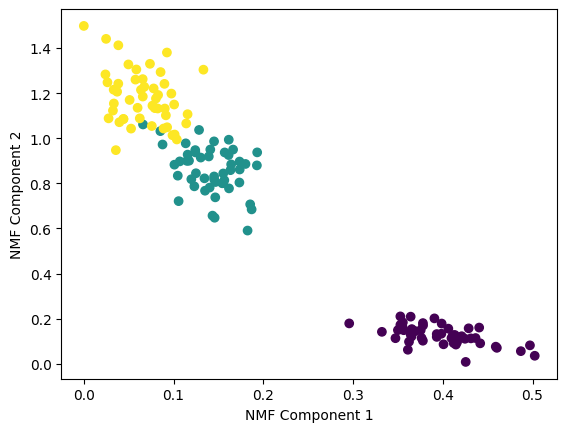

In [13]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨. **추천 영역**에도 활발하게 적용.